# Fetal Health Classification

Classify fetal health in 3 categories in order to prevent child and maternal mortality.

### Data

This dataset contains 2126 samples extracted from Cardiotocogram exams.
Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms.
J Matern Fetal Med 5:311-318.

## Table of contents

In [1]:
# 1 Acquire
#   a/ Import CSV from Kaggle

# 2 Prepare
#   a/ Set variables name
#   b/ Clean samples
#   c/ Set data type

# 3/ Analyse
#   a/ pre analyse
#   b/ Correlation between variables
#   c/ Principal Components Analysis (PCA)
#   d/ Find the best fitting model
#       Support vector machines (SVMs) LinearSVC
#       Nearest Neighbors Classification
#       Support vector machines (SVMs) C-Support Vector Classification (SCV)
#   e/ Nearest Neighbors Classification with midwives usual values
# 4/ Report (presentation support)
# 5/ Act    (presentation support)

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import prince
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
# Figures parameters
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams["figure.figsize"] = (10,10)

In [4]:
def CsvToPandas (path_to_csv, input_col):
    ''' load csv to a pandas data frame:
        input:  path to csv file
                column to extract
        output: pandas data frame'''
    try:
        output_df = pd.read_csv(path_to_csv, usecols=input_col)
    except FileNotFoundError:
        return print("file not found, input the path to the csv file")
    return output_df

In [5]:
def save_image(target_path, file_format=".png"):
    ''' save all figures instanced by pyplot in path target
        input:  path to saved file (optional) 
                file format (optional)
        output: image file saved in target path'''
    for i in plt.get_fignums():
        plt.figure(i).savefig( target_path + str(i) + file_format)
    print(f"{i} figures saved ")
    return 0

## 1 Acquire

### a/ Import CSV from Kaggle

In [9]:
df_data = CsvToPandas("./data/fetal_health.csv", 
                    ["baseline value","accelerations","fetal_movement","uterine_contractions",
                    "light_decelerations","severe_decelerations","prolongued_decelerations",
                    "abnormal_short_term_variability","mean_value_of_short_term_variability",
                    "percentage_of_time_with_abnormal_long_term_variability",
                    "mean_value_of_long_term_variability", "fetal_health"])


## 2 Prepare

### a/ Set variables name

In [10]:
df_data.rename(columns = {"mean_value_of_short_term_variability":"mean_short_term_variability"}, inplace=True )
df_data.rename(columns = {"percentage_of_time_with_abnormal_long_term_variability":"abnormal_long_term_variability"}, inplace=True )
df_data.rename(columns = {"mean_value_of_long_term_variability":"long_term_variability"}, inplace=True )

### b/ Clean samples

In [11]:
df_data.dropna(inplace=True)

### c/ Set data type

In [12]:
df_data["baseline value"] = df_data["baseline value"].astype(int)
df_data["accelerations"] = round(df_data["accelerations"], 4)
df_data["fetal_movement"] = round(df_data["fetal_movement"], 4)
df_data["uterine_contractions"] = round(df_data["uterine_contractions"], 4)
df_data["light_decelerations"] = round(df_data["light_decelerations"], 4)
df_data["severe_decelerations"] = round(df_data["severe_decelerations"], 4)
df_data["prolongued_decelerations"] = round(df_data["prolongued_decelerations"], 4)
df_data["abnormal_long_term_variability"] = df_data["abnormal_long_term_variability"].astype(int)
df_data["fetal_health"] = df_data["fetal_health"].astype(int)

## 3/ Analyse

### a/ pre analyse

In [14]:
df_data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_short_term_variability,abnormal_long_term_variability,long_term_variability,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,3.000000


### b/ Correlation between variables

([<matplotlib.axis.YTick at 0x7f7399f47160>,
 [Text(0, 0, 'baseline value'),
  Text(0, 1, 'accelerations'),
  Text(0, 2, 'fetal_movement'),
  Text(0, 3, 'uterine_contractions'),
  Text(0, 4, 'light_decelerations'),
  Text(0, 5, 'severe_decelerations'),
  Text(0, 6, 'prolongued_decelerations'),
  Text(0, 7, 'abnormal_short_term_variability'),
  Text(0, 8, 'mean_short_term_variability'),
  Text(0, 9, 'abnormal_long_term_variability'),
  Text(0, 10, 'long_term_variability'),
  Text(0, 11, 'fetal_health')])

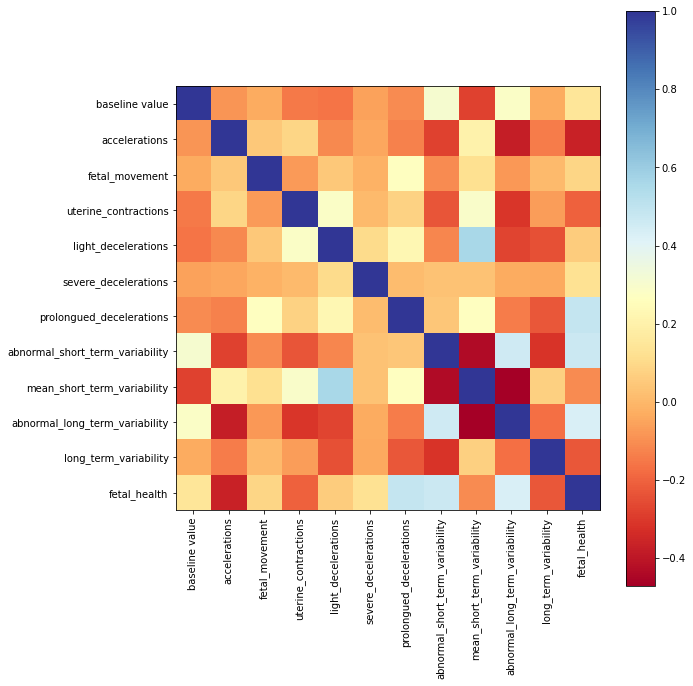

In [15]:
df_correlation = df_data.corr()

plt.imshow(df_correlation, cmap ="RdYlBu")
# Displaying a color bar 
plt.colorbar() 
# Assigning labels of x-axis according to dataframe 
plt.xticks(range(len(df_correlation)), df_correlation.columns, rotation=90) 

# Assigning labels of y-axis according to dataframe 
plt.yticks(range(len(df_correlation)), df_correlation.index) 

### c/ Principal Components Analysis (PCA)

In [16]:
# extract variables and targets
mapping = df_data["fetal_health"]
df_pca = df_data.drop(columns = "fetal_health").copy()
df_pca.reset_index(drop=True, inplace=True)

In [18]:
group_mapping = pd.Series(mapping).map({1:"Normal", 2:"Suspicious", 3:"Pathological"})
# list  mapping:
group_mapping

0       Suspicious
1           Normal
2           Normal
3           Normal
4           Normal
           ...    
2121    Suspicious
2122    Suspicious
2123    Suspicious
2124    Suspicious
2125        Normal
Name: fetal_health, Length: 2126, dtype: object

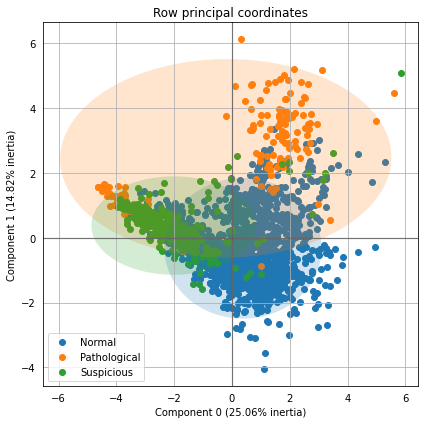

In [19]:
# Initialize the SKlearn PCA class with prince
pca = prince.PCA(   n_components=11,
                    n_iter=3,
                    rescale_with_mean=True,
                    rescale_with_std=True,
                    copy=True,
                    check_input=True,       
                    engine='auto')

# train the model
pca = pca.fit(df_pca)

# Apply dimensionality reduction 
# arr_data is projected on the principal components.
pca.transform(df_pca)

# plot PCA with prince/matplotlib method
ax = pca.plot_row_coordinates(df_pca, ax=None, figsize=(6, 6), x_component=0, y_component=1,
            labels=None, color_labels=group_mapping, ellipse_outline=False, ellipse_fill=True, show_points=True)

### d/ Explained inertia by principal components

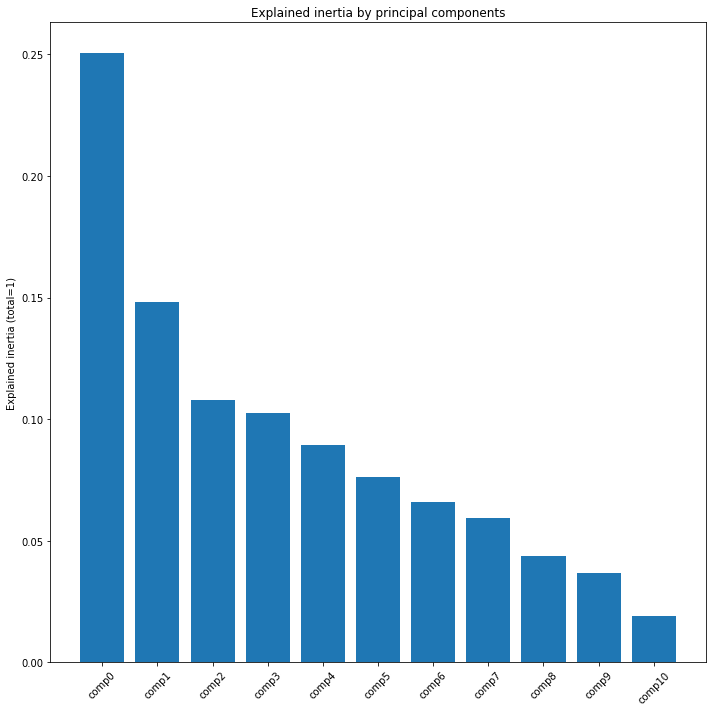

In [21]:
y_value = pca.explained_inertia_
x_value = [f"comp{x}" for x in range(len(y_value))]
fig, ax = plt.subplots()
ax.bar(x_value, y_value)
ax.set_ylabel("Explained inertia (total=1)")
ax.set_title("Explained inertia by principal components")
ax.xaxis.set_tick_params(rotation=45)

Text(0.5, 1.0, 'Variable correlations with 2 first principal components')

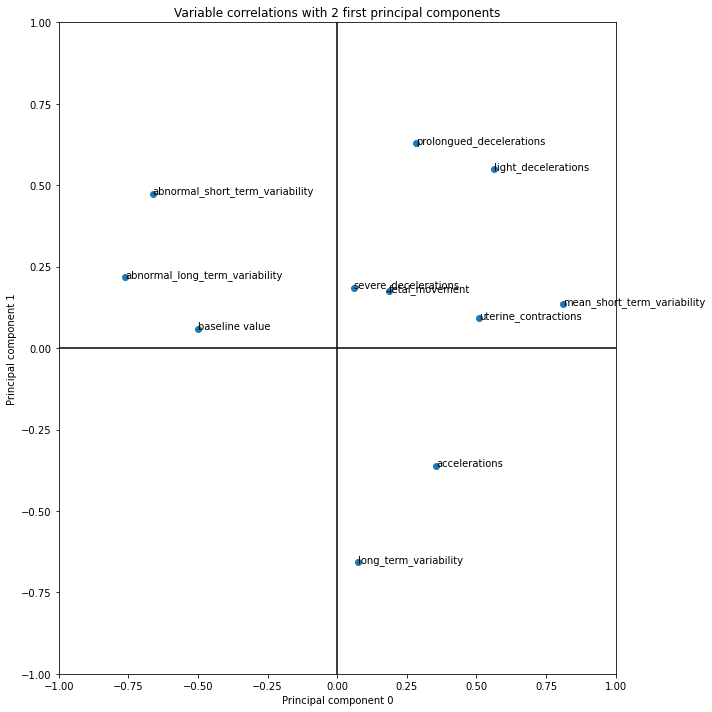

In [22]:
# Columns correlations with the 2 principal components
x_value = pca.column_correlations(df_pca).iloc[:,0]
y_value = pca.column_correlations(df_pca).iloc[:,1]
names = pca.column_correlations(df_pca).index

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=x_value, y=y_value)
# plot x-y line axis
ax.plot([-1,1],[0,0], color="black")
ax.plot([0,0],[-1,1], color="black")

# plot value names
for index, name in enumerate(names):
    ax.annotate(name, (x_value[index], y_value[index]))

ax.set_xlabel("Principal component 0")
ax.set_ylabel("Principal component 1")
plt.xlim(-1,1)
plt.ylim(-1, 1)
ax.set_title("Variable correlations with 2 first principal components")

### d/ Find the best fitting model

In [23]:
# create copy
df_copy = df_data.copy()

# declare features to use
features = ["baseline value","accelerations","fetal_movement","uterine_contractions",
            "light_decelerations","severe_decelerations","prolongued_decelerations",
            "abnormal_short_term_variability","mean_short_term_variability",
            "abnormal_long_term_variability",
            "long_term_variability"]

# separate features from target
X=df_copy[features]
y=df_copy['fetal_health']
# perform split: 40% train + 60% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

### Support vector machines (SVMs) LinearSVC

In [24]:
clf = LinearSVC(max_iter=10000)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"{model} => accuracy score: {accuracy_score(y_test, y_pred)}")

LinearSVC(max_iter=10000) => accuracy score: 0.786833855799373


/home/zenbook/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Nearest Neighbors Classification

In [25]:
neigh = KNeighborsClassifier(n_neighbors=3)
model = neigh.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print(f"{model} => accuracy score: {accuracy_score(y_test, y_pred)}")

KNeighborsClassifier(n_neighbors=3) => accuracy score: 0.8746081504702194


### Support vector machines (SVMs) C-Support Vector Classification (SCV)

In [26]:
clf = svm.SVC()
model=clf.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print(f"{model} => accuracy score: {accuracy_score(y_test, y_pred)}")

SVC() => accuracy score: 0.8134796238244514


### e/ Nearest Neighbors Classification with midwives usual variables

In [28]:
features = ["baseline value", "accelerations", "uterine_contractions",
            "light_decelerations", "severe_decelerations",
            "prolongued_decelerations", "long_term_variability"]

# separate features from target
X=df_copy[features]
y=df_copy['fetal_health']
# perform split: 40% train + 60% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

# Nearest Neighbors Classification
neigh = KNeighborsClassifier(n_neighbors=3)
model = neigh.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test with value traced by midwives in the patient report")
print(f"{model} => accuracy score: {accuracy_score(y_test, y_pred)}")

Test with value traced by midwives in the patient report
KNeighborsClassifier(n_neighbors=3) => accuracy score: 0.7562695924764891


In [ ]:
save_image(target_path="./figures/figure")